# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 636


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | byron bay
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | cockburn town
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | olinda
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | stromness
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | jalu
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 2

Processing Record 40 of Set 4 | atbasar
Processing Record 41 of Set 4 | havelock
Processing Record 42 of Set 4 | bongandanga
Processing Record 43 of Set 4 | samarkand
Processing Record 44 of Set 4 | carlsbad
Processing Record 45 of Set 4 | kaitangata
Processing Record 46 of Set 4 | bridlington
Processing Record 47 of Set 4 | adeje
Processing Record 48 of Set 4 | cape town
Processing Record 49 of Set 4 | kangaatsiaq
Processing Record 0 of Set 5 | constitucion
Processing Record 1 of Set 5 | ust-kamchatsk
City not found. Skipping...
Processing Record 2 of Set 5 | jumla
Processing Record 3 of Set 5 | huarmey
Processing Record 4 of Set 5 | karaul
City not found. Skipping...
Processing Record 5 of Set 5 | vestmanna
Processing Record 6 of Set 5 | anjozorobe
Processing Record 7 of Set 5 | provideniya
Processing Record 8 of Set 5 | nizhniy ingash
Processing Record 9 of Set 5 | russell
Processing Record 10 of Set 5 | gornopravdinsk
Processing Record 11 of Set 5 | quba
Processing Record 12 of Set

Processing Record 28 of Set 8 | arkhara
Processing Record 29 of Set 8 | kaoma
Processing Record 30 of Set 8 | tessalit
Processing Record 31 of Set 8 | sunrise manor
Processing Record 32 of Set 8 | comodoro rivadavia
Processing Record 33 of Set 8 | zhengjiatun
Processing Record 34 of Set 8 | ozu
Processing Record 35 of Set 8 | sola
Processing Record 36 of Set 8 | morant bay
Processing Record 37 of Set 8 | porto belo
Processing Record 38 of Set 8 | burgeo
Processing Record 39 of Set 8 | vila do maio
Processing Record 40 of Set 8 | guerrero negro
Processing Record 41 of Set 8 | charters towers
Processing Record 42 of Set 8 | cayenne
Processing Record 43 of Set 8 | macklin
Processing Record 44 of Set 8 | adre
Processing Record 45 of Set 8 | nelson bay
Processing Record 46 of Set 8 | ust-kan
Processing Record 47 of Set 8 | sal rei
Processing Record 48 of Set 8 | dong hoi
Processing Record 49 of Set 8 | gravelbourg
Processing Record 0 of Set 9 | dakar
Processing Record 1 of Set 9 | eagle pas

Processing Record 15 of Set 12 | sorong
Processing Record 16 of Set 12 | ryotsu
Processing Record 17 of Set 12 | aykhal
Processing Record 18 of Set 12 | socol
Processing Record 19 of Set 12 | springbok
Processing Record 20 of Set 12 | lukulu
Processing Record 21 of Set 12 | gushikawa
Processing Record 22 of Set 12 | leszno
Processing Record 23 of Set 12 | lagunas
Processing Record 24 of Set 12 | pozoblanco
Processing Record 25 of Set 12 | mezen
Processing Record 26 of Set 12 | namibe
Processing Record 27 of Set 12 | palana
Processing Record 28 of Set 12 | christchurch
Processing Record 29 of Set 12 | joshimath
Processing Record 30 of Set 12 | tura
Processing Record 31 of Set 12 | santa isabel do rio negro
Processing Record 32 of Set 12 | dunedin
Processing Record 33 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 34 of Set 12 | sao joao da barra
Processing Record 35 of Set 12 | pemangkat
Processing Record 36 of Set 12 | mezhdurechensk
Processing Record 37 of Set 12 |

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,byron bay,-28.6500,153.6167,27.75,61,92,3.98,AU,1675819711
1,rikitea,-23.1203,-134.9692,26.67,68,7,5.00,PF,1675819593
2,cockburn town,21.4612,-71.1419,25.48,75,0,10.11,TC,1675819711
3,tuatapere,-46.1333,167.6833,12.51,66,81,6.51,NZ,1675819711
4,castro,-24.7911,-50.0119,16.99,92,26,2.48,BR,1675819689


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,byron bay,-28.6500,153.6167,27.75,61,92,3.98,AU,1675819711
1,rikitea,-23.1203,-134.9692,26.67,68,7,5.00,PF,1675819593
2,cockburn town,21.4612,-71.1419,25.48,75,0,10.11,TC,1675819711
3,tuatapere,-46.1333,167.6833,12.51,66,81,6.51,NZ,1675819711
4,castro,-24.7911,-50.0119,16.99,92,26,2.48,BR,1675819689


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

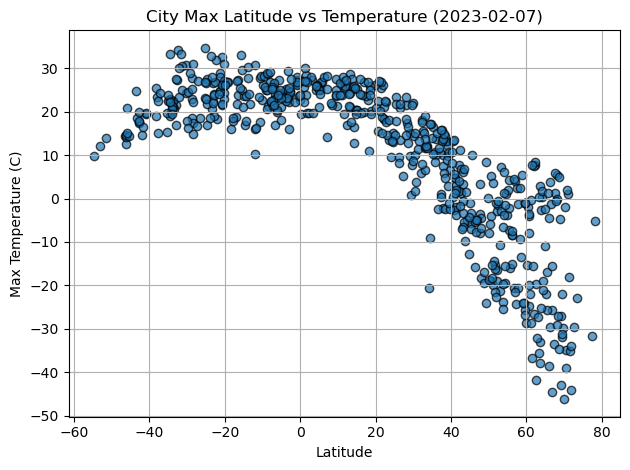

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker="o",edgecolor="black",alpha=.70)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2023-02-07)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

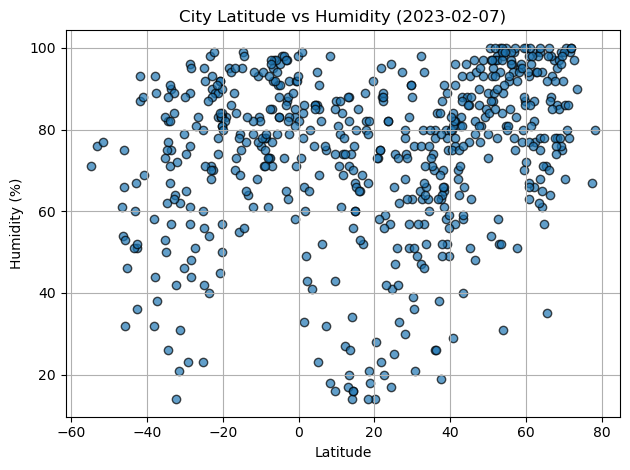

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker="o",edgecolor="black",alpha=.70)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2023-02-07)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

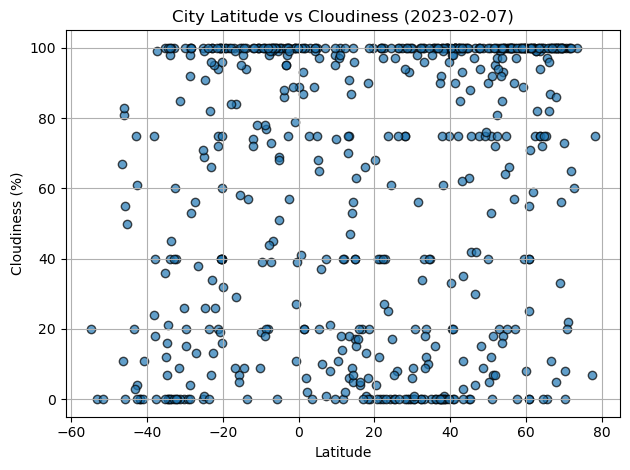

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker="o",edgecolor="black",alpha=.70)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-02-07)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

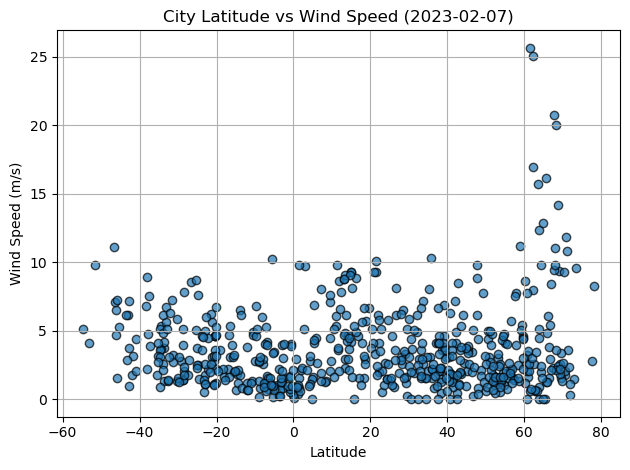

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker="o",edgecolor="black",alpha=.70)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-02-07)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
def linregressionplot (x_axis,y_axis,x_label,y_label,line_placement,ylim=None):
    (slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
    y_pred = slope*x_axis+intercept
    line_eq = f'y={round(slope,2)}x+{round(intercept,2)}'
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,y_pred,color="red")
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    plt.tight_layout()
    plt.grid()
    print(f'The r-value is: {rvalue}')

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,cockburn town,21.4612,-71.1419,25.48,75,0,10.11,TC,1675819711
8,tasiilaq,65.6145,-37.6368,-16.91,35,0,16.15,GL,1675819511
10,stromness,58.9650,-3.2960,5.49,77,100,11.18,GB,1675819714
12,jalu,29.0331,21.5482,9.75,57,93,3.27,LY,1675819714
13,chokurdakh,70.6333,147.9167,-39.12,100,100,1.73,RU,1675819608


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,byron bay,-28.6500,153.6167,27.75,61,92,3.98,AU,1675819711
1,rikitea,-23.1203,-134.9692,26.67,68,7,5.00,PF,1675819593
3,tuatapere,-46.1333,167.6833,12.51,66,81,6.51,NZ,1675819711
4,castro,-24.7911,-50.0119,16.99,92,26,2.48,BR,1675819689
5,busselton,-33.6500,115.3333,22.42,57,0,3.71,AU,1675819712


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8431621982434816


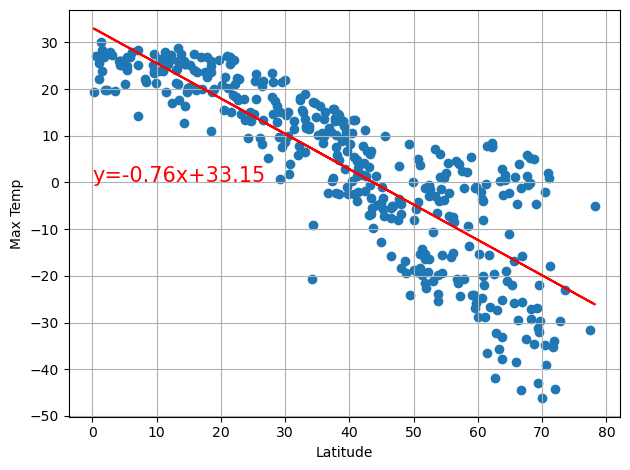

In [78]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Max Temp"
line_placement = (0,0)

linregressionplot(x_axis,y_axis,x_label,y_label,line_placement)

The r-value is: 0.34679547770480834


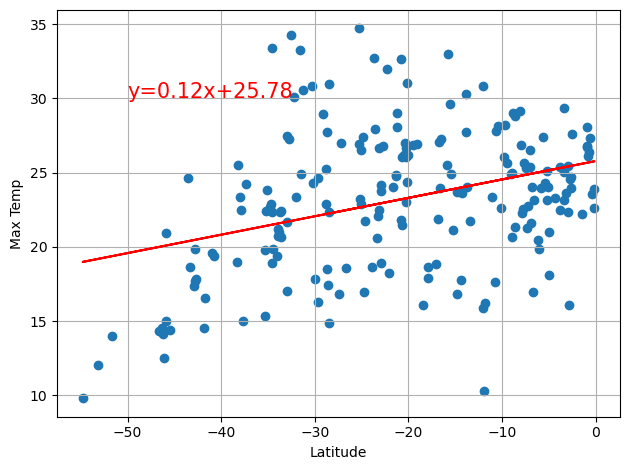

In [77]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Max Temp"
line_placement = (-50,30)

linregressionplot(x_axis,y_axis,x_label,y_label,line_placement)

**Discussion about the linear relationship:** 
The Northern Hemisphere has a strong negative correlation between Latitude and Max Temperature, meaning the higher the latitude (further north) the lower the max temperature. 

The Southern Hemisphere has a weak positive correlation between Latitude and Max Temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.41403080473858755


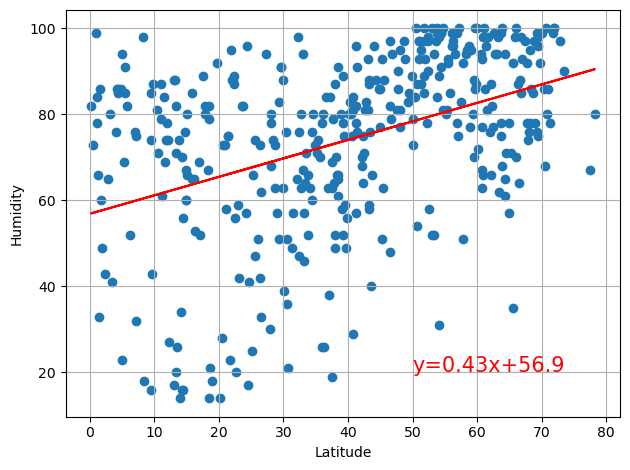

In [76]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
line_placement = (50,20)

linregressionplot(x_axis,y_axis,x_label,y_label,line_placement)

The r-value is: 0.4387686842516856


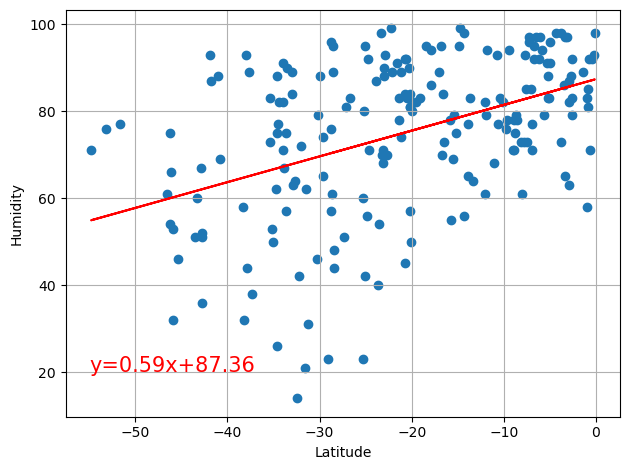

In [75]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
line_placement = (-55,20)

linregressionplot(x_axis,y_axis,x_label,y_label,line_placement)

**Discussion about the linear relationship:** 
The Northen Hemisphere has a weak positive correlation between Latitude and Humidity. The greater the Latitude the more humid it will be. I would have expected this to be the opposite, meaning the further you get away from the equator the less humif it would be.

The Souther Hemisphere has a weak positive correlation between Latitude and Humidity. The closer you get to the equator, the more humid it will be.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.25914112339977063


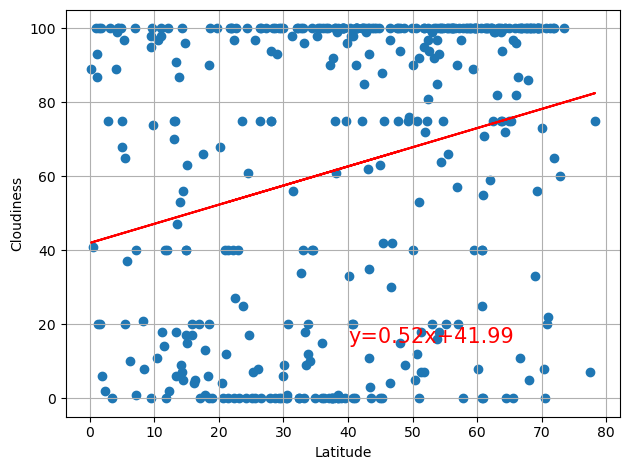

In [74]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
line_placement = (40,15)

linregressionplot(x_axis,y_axis,x_label,y_label,line_placement)

The r-value is: 0.4567526513379926


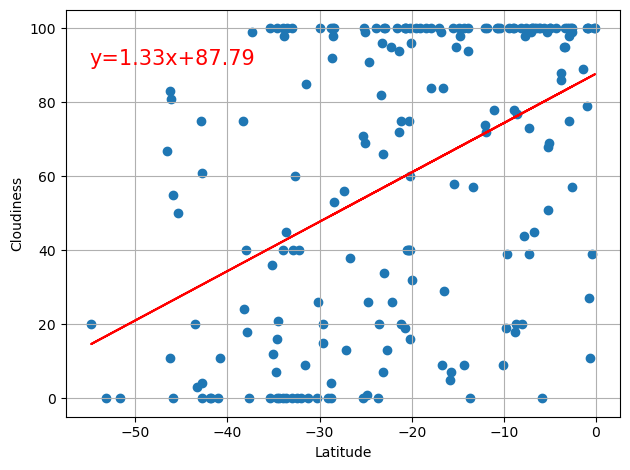

In [82]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
line_placement = (-55,90)

linregressionplot(x_axis,y_axis,x_label,y_label,line_placement)

**Discussion about the linear relationship:** 
The Northen Hemisphere has a weak positive correlation between Latitude and Cloudiness.
The Souther Hemisphere has a semi-weak positive correlation with an r value of 0.45. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08082274247802931


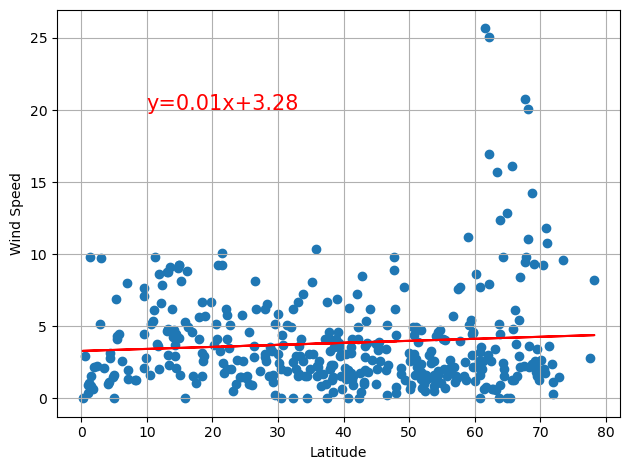

In [84]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
line_placement = (10,20)

linregressionplot(x_axis,y_axis,x_label,y_label,line_placement)

The r-value is: -0.4232377604910165


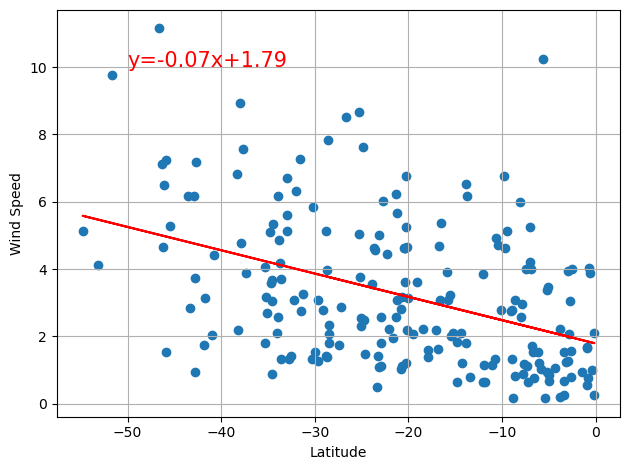

In [85]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
line_placement = (-50,10)

linregressionplot(x_axis,y_axis,x_label,y_label,line_placement)

**Discussion about the linear relationship:** 
The Northern Hemipshere has a very weak positive correlation between Latitude and Wind Speed. Meaning regardless of your latitude in the northen hemisphere, wind speed is not strongly correlated with.
The Souther Hemisphere has a semi-weak negative correlation between Latidude and Wind Speed. the closer to the equator, the less the wind speed, and the further from the equator, the greater the wind speed.